## Extraction of Playlist Tracks

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import requests

In [2]:
#Token / Ids
url='https://accounts.spotify.com/api/token'
client_id='39c58ce155a94f008ad14229d8447ef7'
client_secret='c03dc70737814e6cb7f887e50db315ed'

In [3]:
auth_response=requests.post(url, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
    })

In [4]:
auth_response_data=auth_response.json()
access_token=auth_response_data['access_token']
print(access_token)

BQBjQyv_i0uww3a9shKw6mwAAkwEfURv64vkGHoFYerZWyZTF-ABVPqaJvlfi4lRmP4VbkBt_0Wzifv57uY


In [5]:
headers={'Authorization': 'Bearer {}'.format(access_token)}

In [6]:
#Rock Top 1000
import json
playlists_url=['https://api.spotify.com/v1/playlists/7KMtxb9kh3TtVvJTdLtJ2K/tracks?limit=100&offset=',
               'https://api.spotify.com/v1/playlists/4BJbcyG5JosaXGyucqOyI7/tracks?limit=100&offset=',
               'https://api.spotify.com/v1/playlists/5AVEP6Z2kNCo1ZHShutXbT/tracks?limit=100&offset=',
               'https://api.spotify.com/v1/playlists/3RPaWvjgg1SAi8oIh09Irp/tracks?limit=100&offset=',
               'https://api.spotify.com/v1/playlists/7CI3NR7rvCkgiLhch1qprf/tracks?limit=100&offset=']
songs_lst=[]
dataframes=[]
#Retrieval Function
def all_songs(playlists_url,songs_lst,dataframes):
    for url in playlists_url:
        for x in range(0,1000,100):
            songs=requests.get(url+str(x),headers=headers)
            songs_json=songs.json()
            songs_lst.append(songs_json)
        df=pd.json_normalize(songs_lst,record_path='items')
        print(len(df))
    dataframes.append(df)

all_songs(playlists_url,songs_lst,dataframes)

1000
2000
3000
3747
4736


These playlist urls represent top 1000 tracks playlists(with the exception of country) in the order of rock, trance, rap, country and R&B. Kept track of columns in dataframe to later assign genre to each track.

## Cleaning Data

In [7]:
#Preview
df=pd.concat(dataframes,ignore_index=True)
print(df.shape)
pd.set_option('display.max_columns',41)
df.head()

(4736, 40)


,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.artists,track.available_markets,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",https://open.spotify.com/album/14eK347GdWO4mBB...,https://api.spotify.com/v1/albums/14eK347GdWO4...,14eK347GdWO4mBBx78tsut,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sublime,1996-07-30,day,17.0,album,spotify:album:14eK347GdWO4mBBx78tsut,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,182746,False,False,USGA19649253,https://open.spotify.com/track/2hnMS47jN0etwvF...,https://api.spotify.com/v1/tracks/2hnMS47jN0et...,2hnMS47jN0etwvFPzYk11f,False,Santeria,78,None,True,6,track,spotify:track:2hnMS47jN0etwvFPzYk11f,None
1,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",https://open.spotify.com/album/0kBfgEilUFCMIQY...,https://api.spotify.com/v1/albums/0kBfgEilUFCM...,0kBfgEilUFCMIQY5IOjG4t,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Slippery When Wet,1986-08-16,day,10.0,album,spotify:album:0kBfgEilUFCMIQY5IOjG4t,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,249293,False,False,USPR38619998,https://open.spotify.com/track/37ZJ0p5Jm13JPev...,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,37ZJ0p5Jm13JPevGcx4SkF,False,Livin' On A Prayer,83,None,True,3,track,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,None
2,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",https://open.spotify.com/album/28yHV3Gdg30AiB8...,https://api.spotify.com/v1/albums/28yHV3Gdg30A...,28yHV3Gdg30AiB8h8em1eW,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Appetite For Destruction,1987-07-21,day,12.0,album,spotify:album:28yHV3Gdg30AiB8h8em1eW,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,356066,False,False,USGF18714809,https://open.spotify.com/track/7snQQk1zcKl8gZ9...,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,7snQQk1zcKl8gZ92AnueZW,False,Sweet Child O' Mine,75,None,True,9,track,spotify:track:7snQQk1zcKl8gZ92AnueZW,None
3,2019-05-14T15:11:28Z,False,None,https://open.spotify.com/user/frequencine,https://api.spotify.com/v1/users/frequencine,frequencine,user,spotify:user:frequencine,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",https://open.spotify.com/album/14eK347GdWO4mBB...,https://api.spotify.com/v1/albums/14eK347GdWO4...,14eK347GdWO4mBBx78tsut,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sublime,1996-07-30,day,17.0,album,spotify:album:14eK347GdWO4mBBx78tsut,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,170906,False,True,USGA19649251,https://open.spotify

In [8]:
#Genre for Each Song
df['genre']='Rock'
df.iloc[1000:2000,40]='Trance'
df.iloc[2000:3000,40]='Rap'
df.iloc[3000:3745,40]='Country'
df.iloc[3745:,40]='R&B'

In [9]:
#Drop Irrelevant Columns
df.drop(['added_at','is_local','primary_color','added_by.external_urls.spotify','added_by.href','added_by.id'
        ,'added_by.type','added_by.uri','track.album.album_type','track.album.available_markets',
         'track.album.external_urls.spotify','track.album.href','track.album.id','track.album.images',
         'track.album.release_date_precision','track.album.total_tracks','track.album.uri','track.artists',
         'track.available_markets','track.disc_number','track.episode','track.external_ids.isrc',
         'track.external_urls.spotify','track.href','track.is_local','track.preview_url','track.track',
        'track.track_number','track.type','track.uri','video_thumbnail.url','track.album.type','track.album.artists',
        'track.album.name'],axis=1,inplace=True)

In [10]:
df.head()

,track.album.release_date,track.duration_ms,track.explicit,track.id,track.name,track.popularity,genre
0,1996-07-30,182746,False,2hnMS47jN0etwvFPzYk11f,Santeria,78,Rock
1,1986-08-16,249293,False,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,83,Rock
2,1987-07-21,356066,False,7snQQk1zcKl8gZ92AnueZW,Sweet Child O' Mine,75,Rock
3,1996-07-30,170906,True,3B4q6KbHbGV51HO3GznBFF,What I Got,74,Rock
4,1989,282653,False,7GonnnalI2s19OCQO1J7Tf,Kickstart My Heart,77,Rock


In [11]:
df.duplicated().value_counts()

False    4734
True        2
dtype: int64

In [12]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

## Extracting Audio Features and Further Cleaning

In [13]:
#Retrieve Audio Features
audio_url='https://api.spotify.com/v1/audio-features/'
audio_features=[]

def get_audio(df,audio_url):
    for x in df['track.id']:
        audio_feat=requests.get(audio_url+str(x),headers=headers)
        audiofeat_json=audio_feat.json()
        audio_features.append(audiofeat_json)

get_audio(df,audio_url)

df1=pd.json_normalize(audio_features)

In [14]:
#Merge based on TrackId
df=df.merge(df1,how='inner',left_on='track.id',right_on='id')
df.head()

,track.album.release_date,track.duration_ms,track.explicit,track.id,track.name,track.popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,error.status,error.message
0,1996-07-30,182746,False,2hnMS47jN0etwvFPzYk11f,Santeria,78,Rock,0.682,0.765,1.0,-5.021,0.0,0.0395,0.02680,0.000034,0.188,0.567,90.807,audio_features,2hnMS47jN0etwvFPzYk11f,spotify:track:2hnMS47jN0etwvFPzYk11f,https://api.spotify.com/v1/tracks/2hnMS47jN0et...,https://api.spotify.com/v1/audio-analysis/2hnM...,182747.0,4.0,NaN,NaN
1,1986-08-16,249293,False,37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,83,Rock,0.532,0.887,0.0,-3.757,1.0,0.0335,0.07780,0.000214,0.294,0.795,122.511,audio_features,37ZJ0p5Jm13JPevGcx4SkF,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,https://api.spotify.com/v1/audio-analysis/37ZJ...,249293.0,4.0,NaN,NaN
2,1987-07-21,356066,False,7snQQk1zcKl8gZ92AnueZW,Sweet Child O' Mine,75,Rock,0.446,0.952,6.0,-5.321,1.0,0.0523,0.09010,0.085700,0.112,0.624,125.303,audio_features,7snQQk1zcKl8gZ92AnueZW,spotify:track:7snQQk1zcKl8gZ92AnueZW,https://api.spotify.com/v1/tracks/7snQQk1zcKl8...,https://api.spotify.com/v1/audio-analysis/7snQ...,356067.0,4.0,NaN,NaN
3,1996-07-30,170906,True,3B4q6KbHbGV51HO3GznBFF,What I Got,74,Rock,0.804,0.696,7.0,-7.470,1.0,0.0899,0.00877,0.000985,0.314,0.657,95.721,audio_features,3B4q6KbHbGV51HO3GznBFF,spotify:track:3B4q6KbHbGV51HO3GznBFF,https://api.spotify.com/v1/tracks/3B4q6KbHbGV5...,https://api.spotify.com/v1/audio-analysis/3B4q...,170907.0,4.0,NaN,NaN
4,1989,282653,False,7GonnnalI2s19OCQO1J7Tf,Kickstart My Heart,77,Rock,0.359,0.981,7.0,-3.622,0.0,0.3030,0.00125,0.002360,0.284,0.271,178.980,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,282653.0,4.0,NaN,NaN


In [15]:
df['time_signature'].value_counts()

4.0    4494
3.0     218
5.0      20
1.0      10
Name: time_signature, dtype: int64

In [16]:
#Duration to Seconds
df['track.duration']=df['track.duration_ms'].map(lambda x:x//1000)
#Track Release Year
df['release_year']=df['track.album.release_date'].str[:4]
#More Irrelevant Columns
df.drop(['track.id','type','id','uri','track_href','analysis_url','duration_ms','time_signature','error.status',
         'error.message','track.duration_ms','track.album.release_date','key','mode','track.name','liveness'],axis=1,inplace=True)

time_signature was removed because most tracks have a value of 4, hence not a differentiating factor in song popularity. Liveness was deleted because most of the tracks were not performed live.

In [17]:
df.head()

,track.explicit,track.popularity,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track.duration,release_year
0,False,78,Rock,0.682,0.765,-5.021,0.0395,0.02680,0.000034,0.567,90.807,182,1996
1,False,83,Rock,0.532,0.887,-3.757,0.0335,0.07780,0.000214,0.795,122.511,249,1986
2,False,75,Rock,0.446,0.952,-5.321,0.0523,0.09010,0.085700,0.624,125.303,356,1987
3,True,74,Rock,0.804,0.696,-7.470,0.0899,0.00877,0.000985,0.657,95.721,170,1996
4,False,77,Rock,0.359,0.981,-3.622,0.3030,0.00125,0.002360,0.271,178.980,282,1989


In [18]:
df.isnull().any()

track.explicit      False
track.popularity    False
genre               False
danceability         True
energy               True
loudness             True
speechiness          True
acousticness         True
instrumentalness     True
valence              True
tempo                True
track.duration      False
release_year         True
dtype: bool

In [19]:
#Songs with no Audio Features
df[pd.isnull(df['danceability'])]

,track.explicit,track.popularity,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track.duration,release_year
2166,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2167,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2168,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2169,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
2170,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2226,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2227,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None
2228,False,0,Rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341,None


In [20]:
#Remove Nulls
'''These songs are part of spotify playlist but no longer playable on spotify'''
df.dropna(inplace=True)

In [21]:
df[df.duplicated()]

,track.explicit,track.popularity,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track.duration,release_year
67,False,70,Rock,0.692,0.496,-7.332,0.0241,0.1720,0.000006,0.376,97.945,298,2001
69,False,70,Country,0.692,0.496,-7.332,0.0241,0.1720,0.000006,0.376,97.945,298,2001
515,False,76,Rock,0.653,0.730,-10.613,0.0430,0.0114,0.000010,0.894,108.705,220,1975
517,False,76,Rap,0.653,0.730,-10.613,0.0430,0.0114,0.000010,0.894,108.705,220,1975
737,False,63,Rock,0.642,0.397,-16.842,0.0639,0.4610,0.000834,0.798,84.064,286,1991
739,False,63,R&B,0.642,0.397,-16.842,0.0639,0.4610,0.000834,0.798,84.064,286,1991
976,False,76,Rock,0.589,0.384,-15.075,0.0332,0.1120,0.000028,0.354,132.909,256,1977
978,False,76,R&B,0.589,0.384,-15.075,0.0332,0.1120,0.000028,0.354,132.909,256,1977
2084,False,77,Rap,0.867,0.646,-4.674,0.2880,0.3030,0.000000,0.670,88.634,304,1996
2086,False,77,R&B,0.867,0.646,-4.674,0.2880,0.3030,0.000000,0.670,88.634,304,1996


In [22]:
#Keep first instance of song in multiple playlists
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [23]:
df.dtypes

track.explicit         bool
track.popularity      int64
genre                object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
valence             float64
tempo               float64
track.duration        int64
release_year         object
dtype: object

In [24]:
#Release year to int
df['release_year']=df['release_year'].apply(pd.to_numeric)

## Exploratory Data Analysis

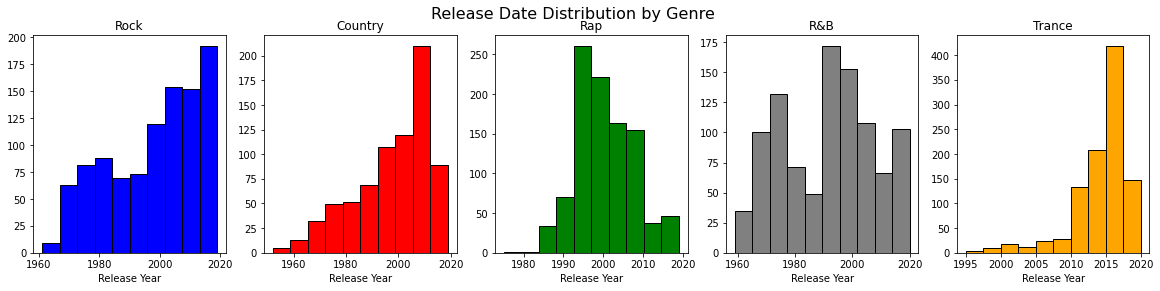

In [25]:
#Release Date Distribution by Genre
genres=df['genre'].unique()
colors=['blue','red','green','grey','orange']

def date_plots(df,genres,colors):
    fig=plt.figure(figsize=(20,4))
    fig.suptitle('Release Date Distribution by Genre',fontsize=16)
    for x in range(1,6):
            ax1=fig.add_subplot(1,5,x)
            ax1.set_title(str(genres[x-1]))
            ax1.set_xlabel('Release Year')
            ax1.hist('release_year',data=df[df['genre']==str(genres[x-1])],color=colors[x-1],edgecolor='black')
    plt.show()
    
date_plots(df,genres,colors)

<AxesSubplot:title={'center':'Explicity by Genre'}, xlabel='genre', ylabel='count'>

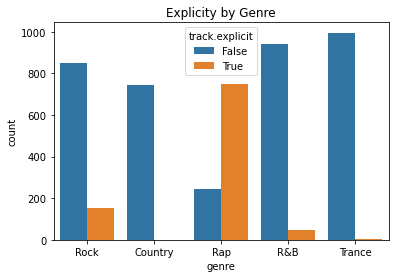

In [26]:
#Explicity by Genre
plt.title('Explicity by Genre')
sns.countplot(x='genre',data=df,hue='track.explicit')

<AxesSubplot:title={'center':'Release Year vs Popularity'}, xlabel='release_year', ylabel='track.popularity'>

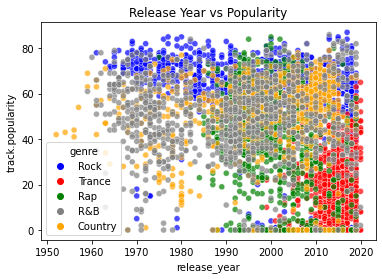

In [27]:
#Release Year vs Popularity
plt.title('Release Year vs Popularity')
sns.scatterplot(x='release_year',y='track.popularity',data=df,hue='genre',
                hue_order=['Rock','Trance','Rap','R&B','Country'],
                palette=['blue','red','green','grey','orange'],alpha=0.7)

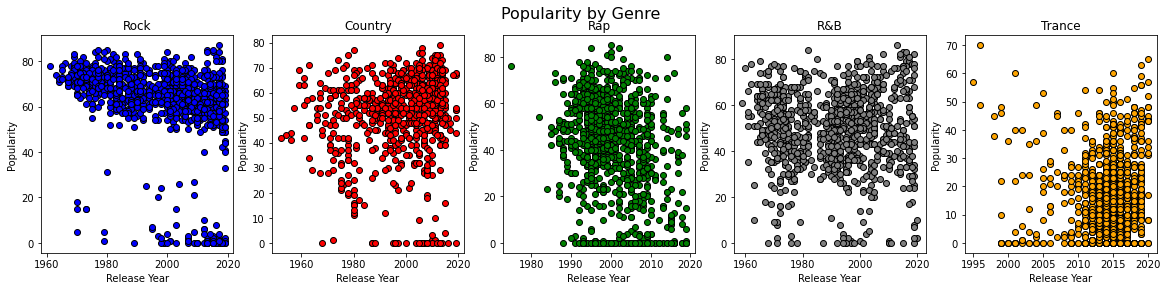

In [28]:
#By Specific Genre
def date_plots(df,genres,colors):
    fig=plt.figure(figsize=(20,4))
    fig.suptitle('Popularity by Genre',fontsize=16)
    for x in range(1,6):
        ax1=fig.add_subplot(1,5,x)
        ax1.set_title(str(genres[x-1]))
        ax1.set_xlabel('Release Year')
        ax1.set_ylabel('Popularity')
        ax1.scatter(x='release_year',y='track.popularity',data=df[df['genre']==str(genres[x-1])],
                    color=colors[x-1],edgecolor='black')
    plt.show()

date_plots(df,genres,colors)

Text(0.5, 0, 'Duration (seconds)')

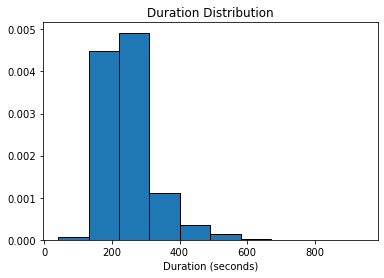

In [29]:
#Duration Distribution
plt.hist(df['track.duration'],density=True,edgecolor='black')
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')

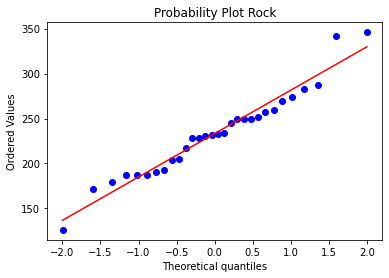

ShapiroResult(statistic=0.9652723073959351, pvalue=0.41908499598503113)


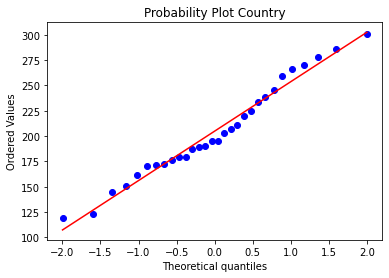

ShapiroResult(statistic=0.9724544882774353, pvalue=0.608284592628479)


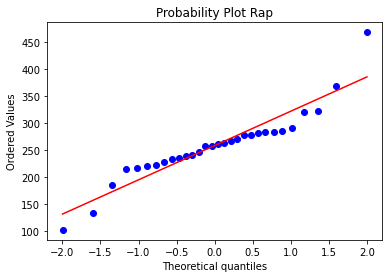

ShapiroResult(statistic=0.9073920249938965, pvalue=0.012796703726053238)


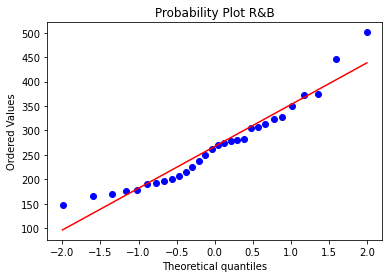

ShapiroResult(statistic=0.9380556344985962, pvalue=0.08063432574272156)


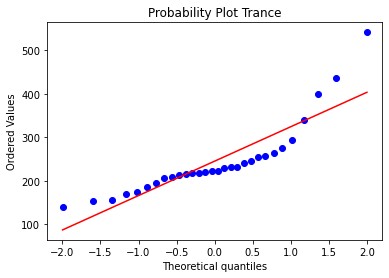

ShapiroResult(statistic=0.8027952313423157, pvalue=7.374938286375254e-05)


In [30]:
#Checking normality QQPlot and Shapiro Wilks Test
genres=df['genre'].unique()
for genre in genres:
    data_sample=df[df['genre']==genre]['track.duration'].sample(30)
    st.probplot(data_sample,dist='norm',plot=plt)
    plt.title('Probability Plot ' +genre)
    plt.show()
    print(st.shapiro(data_sample))

Utilised Shapiro Wilks to test the normality of duration for songs in each genre and QQ plot to visualise distribution from sample. Sample of 30 as sample means approximate a normal distribution when sample sizes >=30 as per Central Limit Theorem. 

In [31]:
#Homogenity of Variances
ratio=df[['track.duration','genre']].groupby('genre').sample(745).std().max()/df[['track.duration','genre']].groupby('genre').sample(745).std().min()
ratio

1.0042503127108549

In [32]:
#ANOVA Test
import statsmodels.api as sm
import statsmodels.formula.api as smf
df.rename(columns={'track.duration':'duration'},inplace=True)

model=smf.ols('duration ~ genre',data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
genre,4.0,1.852283e+06,463070.824990,87.649161,6.004824e-72
Residual,4721.0,2.494214e+07,5283.231685,NaN,NaN


While the population duration is not normally distributed, the homogenity of variances still holds, hence I used the ANOVA test other non-parametric means comparisons.

In [33]:
df.columns

Index(['track.explicit', 'track.popularity', 'genre', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'tempo', 'duration', 'release_year'],
      dtype='object')

In [34]:
#Summary of Audio Feautres
pd.set_option('display.max_rows',100)
df.groupby('genre').describe(include='float64').T

genre                      Country         R&B         Rap          Rock  \
danceability     count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.595944    0.664498    0.734325  5.042790e-01   
                 std      0.111307    0.143896    0.122027  1.258684e-01   
                 min      0.214000    0.185000    0.254000  1.330000e-01   
                 25%      0.529000    0.587000    0.658000  4.287500e-01   
                 50%      0.608000    0.677000    0.754000  5.090000e-01   
                 75%      0.673000    0.769000    0.826000  5.872500e-01   
                 max      0.879000    0.946000    0.965000  8.580000e-01   
energy           count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.579002    0.579426    0.694239  7.862230e-01   
                 std      0.210752    0.174462    0.143683  1.837015e-01   
                 min      0.021000    0.026400    0.253000  1.270000e-01   
                 25%      0.416000    0.449000    0.596750  6.810000e-01   
                 50%      0.586000    0.583000    0.705000  8.485000e-01   
                 75%      0.758000    0.711000    0.807000  9.300000e-01   
                 max      0.965000    0.974000    0.997000  9.980000e-01   
loudness         count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean    -8.955689   -9.344014   -7.352466 -6.182699e+00   
                 std      3.914507    3.155915    3.152346  3.006795e+00   
                 min    -24.385000  -23.883000  -20.749000 -2.232000e+01   
                 25%    -11.522000  -11.327000   -9.050000 -7.514500e+00   
                 50%     -8.326000   -9.156000   -6.763000 -5.436000e+00   
                 75%     -5.772000   -6.998000   -5.131000 -4.034750e+00   
                 max     -1.825000   -1.609000   -0.150000 -1.278000e+00   
speechiness      count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.039897    0.068828    0.261579  6.800240e-02   
                 std      0.028756    0.061201    0.114166  5.277943e-02   
                 min      0.023300    0.023300    0.028800  2.410000e-02   
                 25%      0.029000    0.035300    0.182000  3.535000e-02   
                 50%      0.033200    0.046800    0.264000  4.985000e-02   
                 75%      0.040400    0.072900    0.335000  7.877500e-02   
                 max      0.351000    0.639000    0.817000  4.880000e-01   
acousticness     count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.370020    0.274132    0.137785  8.949115e-02   
                 std      0.276936    0.244794    0.160942  1.733055e-01   
                 min      0.000159    0.000113    0.000017  3.210000e-06   
                 25%      0.115000    0.069700    0.022100  6.175000e-04   
                 50%      0.333000    0.201000    0.077000  9.540000e-03   
                 75%      0.604000    0.439000    0.191250  7.840000e-02   
                 max      0.972000    0.966000    0.890000  9.410000e-01   
instrumentalness count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.005194    0.029917    0.010789  3.506444e-02   
                 std      0.044403    0.117939    0.075996  1.208486e-01   
                 min      0.000000    0.000000    0.000000  0.000000e+00   
                 25%      0.000000    0.000000    0.000000  7.725000e-07   
                 50%      0.000001    0.000026    0.000000  9.700000e-05   
                 75%      0.000066    0.001380    0.000017  3.792500e-03   
                 max      0.888000    0.949000    0.820000  8.730000e-01   
valence          count  745.000000  989.000000  992.000000  1.000000e+03   
                 mean     0.612632    0.657117    0.622187  4.890253e-01   
                 std      0.227949    0.227112    0.180822  2.160265e-01   
                 min      0.048600    0.068000  

<AxesSubplot:>

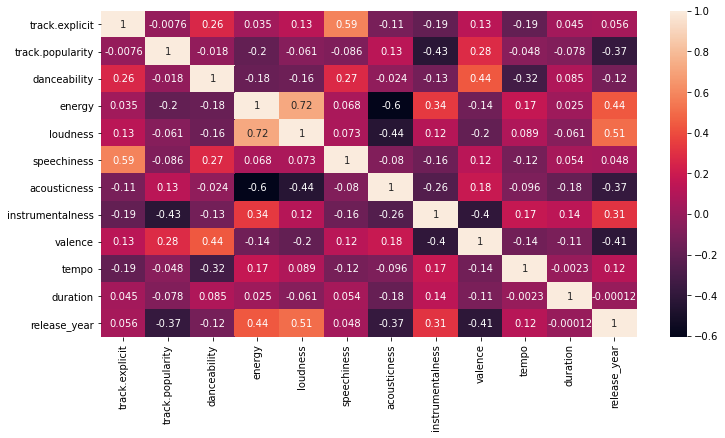

In [35]:
#Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

R Squared 0.5218980685895037


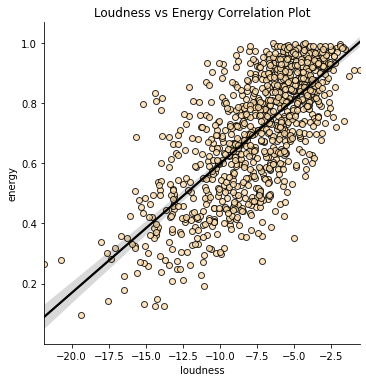

In [36]:
#Loudness vs Energy Correlation Plot
sns.lmplot(x='loudness',y='energy',data=df.sample(1000),line_kws={'color':'black'},scatter_kws={'color':'navajowhite','edgecolor':'black'})
plt.title('Loudness vs Energy Correlation Plot')
print('R Squared',st.pearsonr(df['energy'],y=df['loudness'])[0]**2)

R Squared 0.3653724041700672


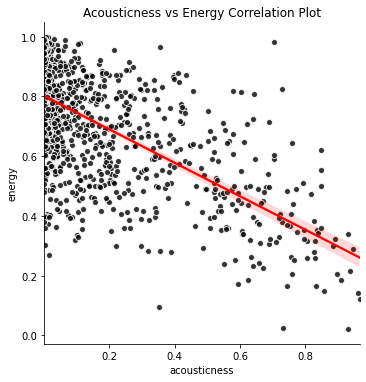

In [37]:
#Acousticness vs Energy Correlation Plot
sns.lmplot(x='acousticness',y='energy',data=df.sample(1000),line_kws={'color':'red'},scatter_kws={'color':'black','edgecolor':'white'})
plt.title('Acousticness vs Energy Correlation Plot')
print('R Squared',st.pearsonr(df['acousticness'],y=df['energy'])[0]**2)

R Squared 0.26103101465632517


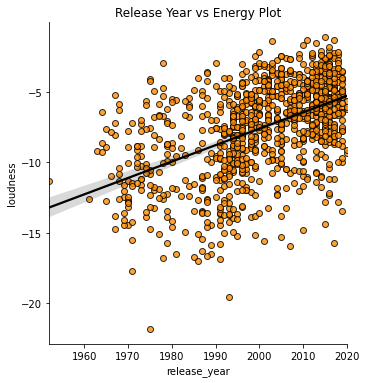

In [38]:
#Loudness vs Release_Year
sns.lmplot(x='release_year',y='loudness',data=df.sample(1000),line_kws={'color':'black'},scatter_kws={'color':'darkorange','edgecolor':'black'})
plt.title('Release Year vs Energy Plot')
print('R Squared',st.pearsonr(df['release_year'],y=df['loudness'])[0]**2)

Text(0.5, 1.0, 'Popularity of Tracks')

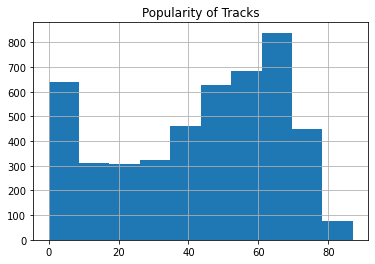

In [39]:
#Popularity Distribution
df.hist('track.popularity')
plt.title('Popularity of Tracks')

# Predicting Popularity and Feature Importance

In [40]:
df.columns

Index(['track.explicit', 'track.popularity', 'genre', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'valence', 'tempo', 'duration', 'release_year'],
      dtype='object')

In [41]:
#Data For Each Genre
genres=df['genre'].unique()
colors=['blue','red','green','grey','orange']

In [42]:
#Import Classes, Establish Predictors and Outcome
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

predictors=['track.explicit','danceability','energy','loudness','speechiness','acousticness','instrumentalness',
           'valence','tempo','duration','release_year']
outcome='track.popularity'

I chose to use the RandomForestsRegressor because the relationships between predictor variables and outcome variables have largely a non-linear relationship. The algorithm is useful in finding relationships between variables and is a more accurate predictor compared to Decision Trees since it averages out results. 

In [43]:
#Trance
from sklearn.metrics import mean_squared_error

best_N_estimators=[]

def randomforests_estimator(df,genres,best_N_estimators):
    for genre in genres:
        X=df[df['genre']==str(genre)][predictors]
        y=df[df['genre']==str(genre)][outcome]
        X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
        rf=RandomForestRegressor(n_estimators=500,random_state=1)

        min_pred_error = float("inf")
        error_going_up = 0
        for n_estimators in range(1, 500):
            rf.n_estimators = n_estimators
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            pred_error = mean_squared_error(y_test, y_pred)
            if pred_error < min_pred_error:
                min_pred_error = pred_error
                error_going_up = 0
            else:
                error_going_up += 1
                if error_going_up == 5:
                    break #Early Stopping
        best_N_estimators.append(rf.n_estimators)
        print(str(genre),' Best N_estimators: ',rf.n_estimators)

randomforests_estimator(df,genres,best_N_estimators)

Rock  Best N_estimators:  18
Country  Best N_estimators:  27
Rap  Best N_estimators:  16
R&B  Best N_estimators:  17
Trance  Best N_estimators:  27


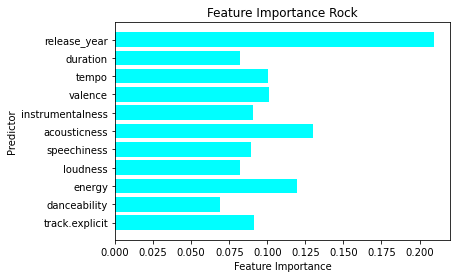

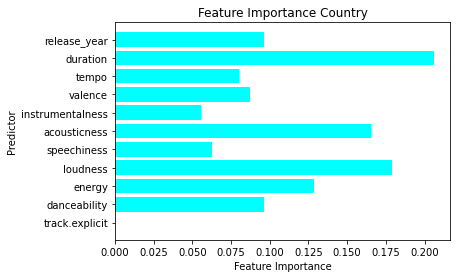

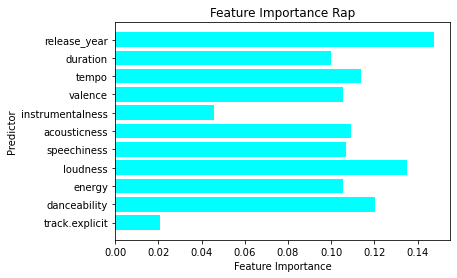

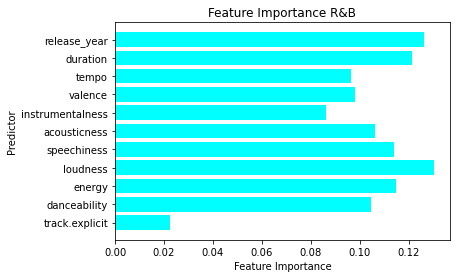

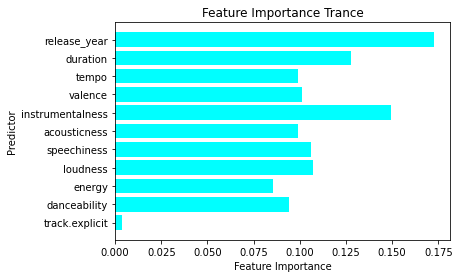

In [44]:
#Feature Importance
def feature_importance(genres,best_N_estimators):
    for genre in genres:
        for n in range(5):
            X=df[df['genre']==str(genre)][predictors]
            y=df[df['genre']==str(genre)][outcome]
            X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
            rf=RandomForestRegressor(n_estimators=best_N_estimators[n],random_state=1)
            rf.fit(X_train,y_train)
            plt.title('Feature Importance '+str(genre))
            plt.xlabel('Feature Importance')
            plt.ylabel('Predictor')
            plt.barh(predictors,rf.feature_importances_,color='cyan')
        plt.show()

feature_importance(genres,best_N_estimators)